In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/RAJESH/Of_Cr.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:8040]
test_data = df.iloc[8040:]

In [5]:
len(train_data),len(test_data)

(8040, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
#X_train = np.reshape(X_train, (8016, seq_len, 1))
#X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (8016, 24)
y_train.shape =  (8016,)
X_test.shape =  (696, 24)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

In [15]:
input_layer = Input(shape=24, dtype='float32')
dense1 = Dense(24, activation='linear')(input_layer)
dense2 = Dense(18, activation='linear')(dense1)
dense3 = Dense(18, activation='linear')(dense2)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 18)                450       
                                                                 
 dropout_1 (Dropout)         (None, 18)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,069
Trainable params: 1,069
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x=X_train, y=y_train, batch_size=128, epochs=300)

Epoch 1/300
63/63 [==============================] - 1s 2ms/step - loss: 5.7150
Epoch 2/300
63/63 [==============================] - 0s 2ms/step - loss: 1.6856
Epoch 3/300
63/63 [==============================] - 0s 2ms/step - loss: 1.1407
Epoch 4/300
63/63 [==============================] - 0s 2ms/step - loss: 0.9732
Epoch 5/300
63/63 [==============================] - 0s 2ms/step - loss: 0.8747
Epoch 6/300
63/63 [==============================] - 0s 2ms/step - loss: 0.8117
Epoch 7/300
63/63 [==============================] - 0s 2ms/step - loss: 0.7703
Epoch 8/300
63/63 [==============================] - 0s 2ms/step - loss: 0.7311
Epoch 9/300
63/63 [==============================] - 0s 2ms/step - loss: 0.7024
Epoch 10/300
63/63 [==============================] - 0s 2ms/step - loss: 0.6921
Epoch 11/300
63/63 [==============================] - 0s 2ms/step - loss: 0.6982
Epoch 12/300
63/63 [==============================] - 0s 2ms/step - loss: 0.6578
Epoch 13/300
63/63 [=================

In [17]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [19]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [20]:
print('Root Mean Squared Error for ANN Model for training is:',rmse_train)
print('Root Mean Squared Error for ANN Model for testing is:',rmse_test)
print('Mean Absolute Error for ANN Model for training is:',mae_train)
print('Mean Absolute Error for ANN Model for testing is:',mae_test)
print('MAPE for ANN Model for training is:',mape_train)
print('MAPE for ANN Model for testing is:',mape_test)

Root Mean Squared Error for ANN Model for training is: 0.597562607315098
Root Mean Squared Error for ANN Model for testing is: 0.5857258403686635
Mean Absolute Error for ANN Model for training is: 0.4738054160061836
Mean Absolute Error for ANN Model for testing is: 0.4620544124201982
MAPE for ANN Model for training is: 0.16125402334229952
MAPE for ANN Model for testing is: 0.15436508214488626


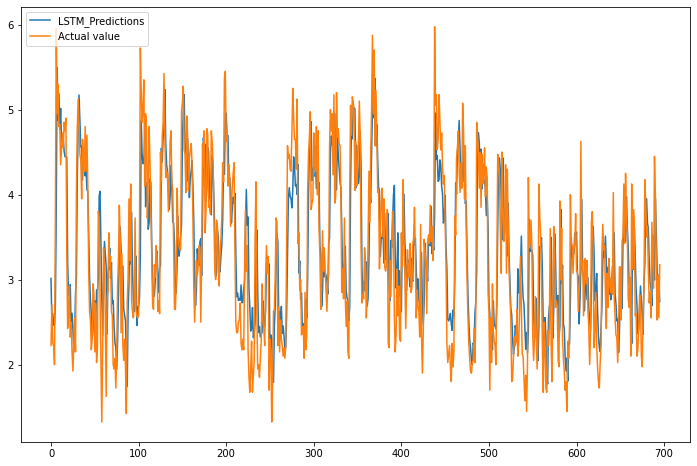

In [21]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [23]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([2.2249999]), array([3.0141807], dtype=float32))

In [24]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.78918076]), array([0.22044063]), array([-0.35318828]), array([-0.23863077]), array([-0.47275615]), array([1.0168438]), array([2.09151506]), array([-0.54446983]), array([0.42484951]), array([-0.39210415]), array([0.05349827]), array([-0.66441965]), array([-0.06635427]), array([0.01790142]), array([-0.10149717]), array([0.34206867]), array([0.30370951]), array([0.45519686]), array([-1.09063101]), array([-0.77442741]), array([-0.23958135]), array([0.03520918]), array([-0.61489654]), array([0.11430192]), array([-0.45515275]), array([-0.49915862]), array([0.07627201]), array([0.1945343]), array([-0.68829155]), array([0.98672724]), array([0.56717539]), array([0.36087132]), array([-0.39637518]), array([-0.3737998]), array([-0.15859985]), array([-0.6207869]), array([0.4785943]), array([0.00395155]), array([-0.11659908]), array([0.57907581]), array([-0.02732182]), array([0.64097786]), array([0.08830643]), array([-0.43926668]), array([-0.41081142]), array([-0.2371726]), array([-0.4254

In [25]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.43591023]), array([-1.56199336]))

In [26]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [27]:
len(neg),len(pos)

(393, 303)